In [11]:
# Qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit_ibm_provider import IBMProvider
#from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit import Aer, assemble
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *


from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService #, Sampler, Estimator, Session, Options
from qiskit_optimization import QuadraticProgram
from qiskit.utils import algorithm_globals
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit.primitives import Sampler

# Loading your IBM Quantum account(s)
#service = QiskitRuntimeService(channel="ibm_quantum")

from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.problems import QuadraticProgram
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit_optimization.algorithms import MinimumEigenOptimizer
#from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit_optimization.applications import Tsp
from qiskit_ibm_runtime import Sampler as SamplerRT
from qiskit_ibm_runtime import Session
from qiskit.algorithms.optimizers import COBYLA

# Grafos

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from itertools import combinations
from sklearn.cluster import KMeans

In [12]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [23]:
from qiskit_optimization.applications import Tsp

from qiskit import Aer, IBMQ
from qiskit.utils import QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms.optimizers import COBYLA

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from itertools import combinations
from sklearn.cluster import KMeans

In [25]:
def Generar_Grafo(Coord,high,low):
    pos = {i: (coord_[0], coord_[1]) for i, coord_ in enumerate(Coord)}
    graph = nx.random_geometric_graph(len(Coord[:,0]), np.hypot(high - low, high - low) + 1, pos=pos)
    for w, v in graph.edges:
        delta = [graph.nodes[w]["pos"][i] - graph.nodes[v]["pos"][i] for i in range(2)]
        graph.edges[w, v]["weight"] = np.rint(np.hypot(delta[0], delta[1]))
    return graph,pos

def generate_coordinate_matrices(Num_Nodos, Limites_x, Limites_y, K):
    # Generar coordenadas aleatorias de nodos
    x_coord = np.random.uniform(Limites_x[0], Limites_x[-1], Num_Nodos)
    y_coord = np.random.uniform(Limites_y[0], Limites_y[-1], Num_Nodos)

    Distancia_Centro = np.sqrt((np.mean(x_coord) - x_coord) ** 2 + (np.mean(y_coord) - y_coord) ** 2)
    Indice_min = np.argmin(Distancia_Centro)

    Warehouse = np.array([x_coord[Indice_min], y_coord[Indice_min]])

    x_coord = np.delete(x_coord, Indice_min)
    y_coord = np.delete(y_coord, Indice_min)

    # Calcular el centro de los clusters utilizando K-means
    coordinates = np.array(list(zip(x_coord, y_coord)))
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(coordinates)
    cluster_labels = kmeans.labels_

    # Inicializar una lista de matrices de coordenadas para cada cluster
    coordinate_matrices = [np.vstack((Warehouse, coordinates[cluster_labels == i])) for i in range(K)]

    return coordinate_matrices


In [26]:
Num_Nodos = 6
Limites_x = (-10, 10)
Limites_y = (-10, 10)
Camiones = 2  # Número de clusters para K-means

# Generar las matrices de coordenadas para los camiones
coordinate_matrices = generate_coordinate_matrices(Num_Nodos, Limites_x, Limites_y, Camiones)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


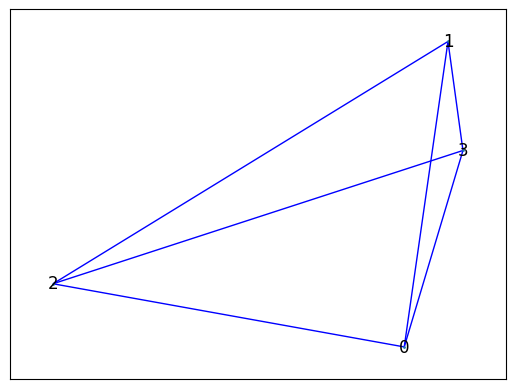

Problem name: TSP

Minimize
  4*x_0_0*x_1_1 + 4*x_0_0*x_1_3 + 5*x_0_0*x_2_1 + 5*x_0_0*x_2_3 + 3*x_0_0*x_3_1
  + 3*x_0_0*x_3_3 + 4*x_0_1*x_1_0 + 4*x_0_1*x_1_2 + 5*x_0_1*x_2_0
  + 5*x_0_1*x_2_2 + 3*x_0_1*x_3_0 + 3*x_0_1*x_3_2 + 4*x_0_2*x_1_1
  + 4*x_0_2*x_1_3 + 5*x_0_2*x_2_1 + 5*x_0_2*x_2_3 + 3*x_0_2*x_3_1
  + 3*x_0_2*x_3_3 + 4*x_0_3*x_1_0 + 4*x_0_3*x_1_2 + 5*x_0_3*x_2_0
  + 5*x_0_3*x_2_2 + 3*x_0_3*x_3_0 + 3*x_0_3*x_3_2 + 6*x_1_0*x_2_1
  + 6*x_1_0*x_2_3 + x_1_0*x_3_1 + x_1_0*x_3_3 + 6*x_1_1*x_2_0 + 6*x_1_1*x_2_2
  + x_1_1*x_3_0 + x_1_1*x_3_2 + 6*x_1_2*x_2_1 + 6*x_1_2*x_2_3 + x_1_2*x_3_1
  + x_1_2*x_3_3 + 6*x_1_3*x_2_0 + 6*x_1_3*x_2_2 + x_1_3*x_3_0 + x_1_3*x_3_2
  + 6*x_2_0*x_3_1 + 6*x_2_0*x_3_3 + 6*x_2_1*x_3_0 + 6*x_2_1*x_3_2
  + 6*x_2_2*x_3_1 + 6*x_2_2*x_3_3 + 6*x_2_3*x_3_0 + 6*x_2_3*x_3_2

Subject to
  Linear constraints (8)
    x_0_0 + x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 + x_2_3 == 1  'c2'
    x_3_0 + x_3_1 + x_3_2 + 

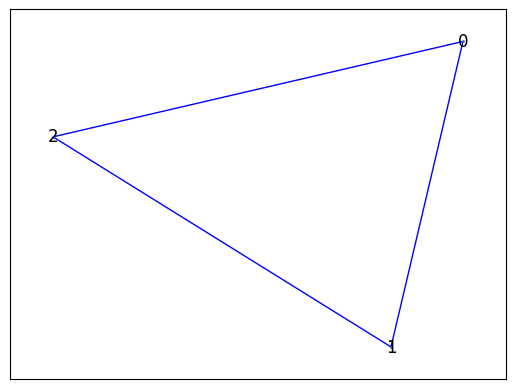

Problem name: TSP

Minimize
  11*x_0_0*x_1_1 + 11*x_0_0*x_1_2 + 7*x_0_0*x_2_1 + 7*x_0_0*x_2_2
  + 11*x_0_1*x_1_0 + 11*x_0_1*x_1_2 + 7*x_0_1*x_2_0 + 7*x_0_1*x_2_2
  + 11*x_0_2*x_1_0 + 11*x_0_2*x_1_1 + 7*x_0_2*x_2_0 + 7*x_0_2*x_2_1
  + 9*x_1_0*x_2_1 + 9*x_1_0*x_2_2 + 9*x_1_1*x_2_0 + 9*x_1_1*x_2_2
  + 9*x_1_2*x_2_0 + 9*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2



In [27]:
grafo1,pos=Generar_Grafo(coordinate_matrices[0],10,-10)
tsp1= Tsp(grafo1)
nx.draw_networkx(grafo1,pos,edge_color="blue",node_size=1,width=1)
plt.show()
qp1 = tsp1.to_quadratic_program()
print(qp1.prettyprint())

grafo2,pos=Generar_Grafo(coordinate_matrices[1],10,-10)
tsp2= Tsp(grafo2)
nx.draw_networkx(grafo2,pos,edge_color="blue",node_size=1,width=1)
plt.show()
qp2 = tsp2.to_quadratic_program()
print(qp2.prettyprint())


In [28]:
IBMQ.load_account()
my_provider = IBMQ.get_provider(hub='ibm-q-asu', group='internal', project='reservations')
my_provider.backends()
ibmq_backend = my_provider.get_backend('ibmq_kolkata')
backend = ibmq_backend

ibmqfactory.load_account:WARNING:2023-09-15 14:49:37,326: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
quantum_instance = QuantumInstance(backend, shots=1000, seed_simulator=10598, seed_transpiler=10598)
#qaoa_mes = QAOA(quantum_instance=quantum_instance)
qaoa_mes = QAOA(quantum_instance=quantum_instance,optimizer=COBYLA(maxiter=100))
optimizer = MinimumEigenOptimizer(qaoa_mes)

# Resolver el problema para cada grafo
result1 = optimizer.solve(qp1)
print("Resultado del primer grafo:", result1)

result2 = optimizer.solve(qp2)
print("Resultado del segundo grafo:", result2)

/tmp/ipykernel_110/427382836.py:1: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1000, seed_simulator=10598, seed_transpiler=10598)
/tmp/ipykernel_110/427382836.py:3: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa_mes = QAOA(quantum_instance=quantum_instance,optimizer=COBYLA(maxiter=100))
/opt/conda/lib/python3.10/site-packages/qiskit/utils/run_circuits.py:411: UserWarning: seed_simulator is not a recognized runtime option and may be ignored by the ba